<a href="https://colab.research.google.com/github/Cepeda-R/Machine-Learning_FullProjects/blob/main/Weather_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PREPARE PROJECT | DEPENDENCIES & LOAD DATA

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python
#install dependencies to help treat big data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 20 kB/s 
     |████████████████████████████████| 578.1 MB 8.2 kB/s 
     |████████████████████████████████| 578.1 MB 7.0 kB/s 
     |████████████████████████████████| 511.8 MB 27 kB/s 


In [2]:
#big data treatment & Keras API
import tensorflow as tf

#data treatment (batches)
import pandas as pd
import numpy as np
import cv2 #image translation to array
import imghdr #image extension

#see images
import matplotlib.pyplot as plt

#directories
import os

#misc
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config IPCompleter.greedy=True

In [3]:
data_dir = '/content/drive/MyDrive/#1Weather_ML_Project/dataset'
#confirm features
os.listdir(data_dir)
#confirm sub_features
#os.listdir(os.path.join(data_dir, 'fogsmog'))

['fogsmog',
 'lightning',
 'rain',
 'sandstorm',
 'snow',
 'cloudy',
 'sunny',
 'hail',
 'frost']

## TREAT DATA. Data treated do not use this more

In [ ]:
#quantity of files inside feature
totalFiles = 0

for base, dirs, files in os.walk(data_dir):
    for Files in files:
        totalFiles += 1
    print('Searching in : ', base, totalFiles)
    totalFiles = 0

Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset 0
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/fogsmog 796
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/lightning 362
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/rain 502
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/sandstorm 660
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/snow 579
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/cloudy 719
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/sunny 903
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/hail 561
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/frost 458


Learning os.remove function

In [ ]:
#this variable os.listdir point to a directory, not an absolute file
a = os.listdir(os.path.join(data_dir, 'sunny'))

absolute path

In [ ]:
#in an absolute string it was able to remove it
#os.remove('/content/drive/MyDrive/#1Weather_ML_Project/dataset/fogsmog/4076.jpg')

absolute variable

In [ ]:
#need to try in variable name
img_name = '1152.jpg'
#absolute path variable
image_removable = os.path.join(data_dir, 'sunny', img_name)
#os.remove(image_removable)

In [ ]:
if os.path.exists(image_removable):
    print('yo, it exists')
else:
    print('where is it??? its not here mate')

where is it??? its not here mate


In [ ]:
#used brake to understand concept before erasing data
image_exts = ['jpg', 'jpeg']
#gave a name for every features and every image
for features in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, features)):
        image_path = os.path.join(data_dir, features, image)
        try:
            img = cv2.imread(image_path) #if its not a valid image
            ext = imghdr.what(image_path) #if its not a valid extension
            if ext not in image_exts:
                print('Image not in ext list', format(image_path))
                os.remove(image_path)
        except:
            print('Issue with image', format(image_path))
        

In [ ]:
#quantity of files inside feature
totalFiles_after = 0
features_qty = []

for base, dirs, files in os.walk(data_dir):
    for Files in files:
        totalFiles_after += 1
    features_qty.append(totalFiles_after)
    print('Searching in : ', base, totalFiles_after)
    totalFiles_after = 0

Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset 0
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/fogsmog 796
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/lightning 362
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/rain 502
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/sandstorm 660
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/snow 579
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/cloudy 719
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/sunny 903
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/hail 561
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/frost 458


In [ ]:
features_qty

[0, 796, 362, 502, 660, 579, 719, 903, 561, 458]

In [ ]:
features_qty = features_qty[1:]
features_average = int(np.mean(features_qty))

In [ ]:
features_average

615

In [ ]:
feature_name = os.listdir(data_dir)

iles = os.listdir('path/to/your/folder')
for file in files[:11]:
    os.remove(file)

In [ ]:
features_qty_before = features_qty

In [ ]:
features_qty_before

[796, 362, 502, 660, 579, 719, 903, 561, 458]

In [ ]:
from random import sample

#for loop to remove randomly files from features above average
for index, values in enumerate(features_qty):
    if values > features_average:
        print (values, feature_name[index])
        #define the index feature and place it in OS
        files_to_remove_dir = os.path.join(data_dir, feature_name[index])
        files_to_remove_os = os.listdir(files_to_remove_dir)
        #define the amount to remove by feature
        amount_to_remove = int(values-features_average)
        print(amount_to_remove)
        #removing the amount define beforehand in a for loop
        for image_to_remove in sample(files_to_remove_os, amount_to_remove):
            print('it will be removed', image_to_remove)
            #apply image name into path to be removed
            img_to_rmv_path_dir = os.path.join(files_to_remove_dir, image_to_remove)
            print(img_to_rmv_path_dir)
            os.remove(img_to_rmv_path_dir)

In [ ]:
features_qty_before

[796, 362, 502, 660, 579, 719, 903, 561, 458]

In [ ]:
#quantity of files inside feature
totalFiles_after = 0
features_qty = []

for base, dirs, files in os.walk(data_dir):
    for Files in files:
        totalFiles_after += 1
    features_qty.append(totalFiles_after)
    print('Searching in : ', base, totalFiles_after)
    totalFiles_after = 0

Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset 0
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/fogsmog 615
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/lightning 362
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/rain 502
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/sandstorm 615
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/snow 579
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/cloudy 615
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/sunny 615
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/hail 561
Searching in :  /content/drive/MyDrive/#1Weather_ML_Project/dataset/frost 458


In [ ]:
#after
features_qty

[0, 615, 362, 502, 615, 579, 615, 615, 561, 458]

<function matplotlib.pyplot.show(*args, **kw)>

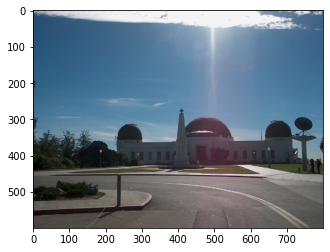

In [ ]:
#just to check
img = cv2.imread(os.path.join(files_to_remove_dir, '1153.jpg'))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

## USING KERAS & BATCH

In [41]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
#prevent out of memory error OOM
#this will be not use since we are using google colab
gpus = tf.config.experimental.list_physical_devices('GPU)')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

Use Keras Utils with Batch and Resize associated to the data

In [52]:
#labels and classes already built with keras utils 
#plus batch size already in 32 and image size 256,256 + shuffle
#its a pipeline
#on the fly
Data = tf.keras.utils.image_dataset_from_directory(data_dir)
#transform data on the fly using numpy (to acess to it)
#this allows to loop
Data_Iterator = Data.as_numpy_iterator()
#this is allowing get one batch 
batch = Data_Iterator.next()

Found 4922 files belonging to 9 classes.


In [8]:
batch[0].shape

(32, 256, 256, 3)

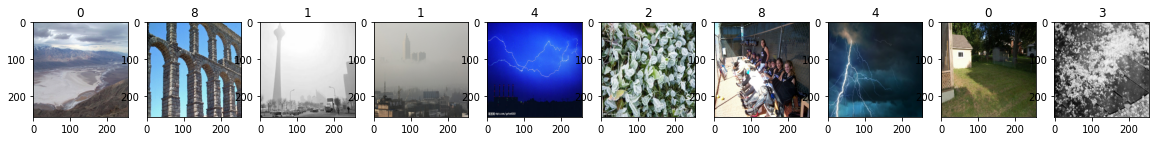

In [9]:
#define layout chart
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
#loop through batch. for every index and image
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int)) #doubt in astype int. Otherwise it would get exponents (not applicable by matplotlib)
    ax[idx].title.set_text(batch[1][idx])

*   0 cloudy
*   1 fogsmog
*   2 frost
*   3 Hail
*   4 lightning
*   5 rain
*   6 sandstorm
*   7 snow
*   8 sunny





**ANOTHER WAY TO DO IT, and faster**

In [123]:
#reduce/transform to have faster processing model and data retrieving
data_scaled = Data.map(lambda x,y: (x/256, y))
#x is images

In [124]:
#data_scaled.as_numpy_iterator().next()[0].max()

In [153]:
#create a batch of data scaled by 256
Data_scaledNp = data_scaled.as_numpy_iterator().next()

In [127]:
#this is allowing get one batch 
#batch_scaled = Data_Iterator2.next()

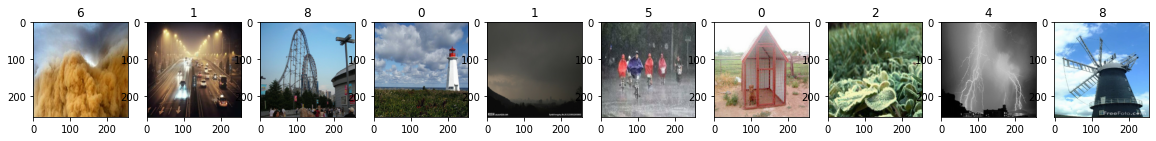

In [130]:
#define layout chart
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
#loop through batch. for every index and image
for idx, img in enumerate(Data_scaledNp[0][:10]):
    ax[idx].imshow(img) #since data is between 0 and 1, int is not needed anymore
    ax[idx].title.set_text(Data_scaledNp[1][idx])

Lets Split Data for Model Training

In [157]:
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, subset="training", seed=123)
#train_split is 1-split value /// validation split is split value
validation_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2,  subset="validation", seed=123)
#If using `validation_split` and shuffling the data, you must provide a `seed` argument, to make sure that there is no overlap between the training and validation subset

Found 4922 files belonging to 9 classes.
Using 3938 files for training.
Found 4922 files belonging to 9 classes.
Using 984 files for validation.


In [ ]:
#NAO ESTA CORRETO - TENHO QUE COLOCAR EM RESIZE

In [159]:
#Standard CNN Model with Layers of Weights and a softmax at the end
standard_model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = [255, 255, 3]),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, (2, 2), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, (2, 2), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation ='softmax')
])

In [160]:
#compile model with type of optimizer, losses and metrics
standard_model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True)

In [161]:
#Train the model - the fun begins
standard_model.fit(train_ds, epochs=20, validation_data=validation_ds, callbacks=callback)

Epoch 1/20


ValueError: ignored

In [ ]:
#Check Status - Performance
loss, accuracy = model.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)


In [ ]:
#Saving Model for future Use
model.save('cnn-model')

In [ ]:
#Upload Model for future Use
model = keras.models.load_model('cnn-model')